In [1]:
!wget -c https://github.com/euphoris/datasets/raw/master/imdb.zip

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
import pandas as pd
df=pd.read_excel('imdb.xlsx', index_col=0)
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2000, stop_words='english')
m=cv.fit_transform(df.review)

In [4]:
m.shape

(748, 2000)

In [5]:
import tensorflow as tf

In [6]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128,input_shape=(2000,),activation='relu')) # 은닉층
#relu 외에 tanh 과 같은 여러 종류가 있다 좋은 것을 사용하면 된다.
model.add(tf.keras.layers.Dense(1,activation='sigmoid')) #출력층

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256128    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 256,257
Trainable params: 256,257
Non-trainable params: 0
_________________________________________________________________


In [8]:
2000*128 + 128 #입력의 갯수 곱하기 출력의 갯수 더하기 출력 하나씩

256128

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #초반부에는 sgd가 잘되고 후반에는 adam이 잘된다.
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
result= model.fit(m.A, df.sentiment.values, epochs=30, batch_size=32, validation_split=0.2,verbose=0)

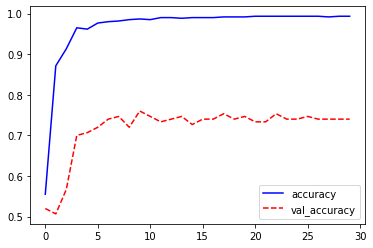

In [11]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], 'b-',label='accuracy')
plt.plot(result.history['val_accuracy'],'r--',label='val_accuracy')
plt.legend()
plt.show()

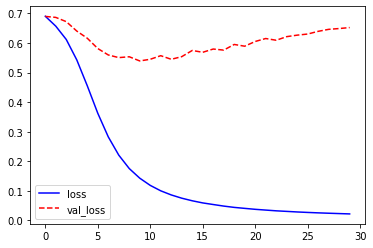

In [12]:
plt.plot(result.history['loss'], 'b-',label='loss')
plt.plot(result.history['val_loss'],'r--',label='val_loss')
plt.legend()
plt.show()

In [13]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath='model-{epoch:02d}',monitor='val_loss',save_best_only=True)

In [14]:
model.fit(m.A, df.sentiment.values, epochs=30, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/30
 1/19 [>.............................] - ETA: 0s - loss: 0.0724 - accuracy: 0.9375WARNING:tensorflow:From C:\Users\JangSeongHyun\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-01\assets
19/19 [==============================] - 1s 31ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.6652 - val_accuracy: 0.7400
Epoch 2/30
19/19 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9950 - val_loss: 0.6660 - val_accuracy: 0.7467
Epoch 3/30
19/19 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9950 - va

In [15]:
import glob
name=sorted(glob.glob('model-*'))[-1]

In [16]:
model=tf.keras.models.load_model(name)